In [2]:
import matplotlib
import numpy as np
from matplotlib.pyplot import imshow, show

NUM_COLORS = 20
colors = np.random.randint(256, size=(NUM_COLORS, 3))

BLOCKS_HORIZONTAL = 20
BLOCKS_VERTICAL = 18
BLOCK_COUNT = 192
BLOCK_WIDTH = 8

Random genome


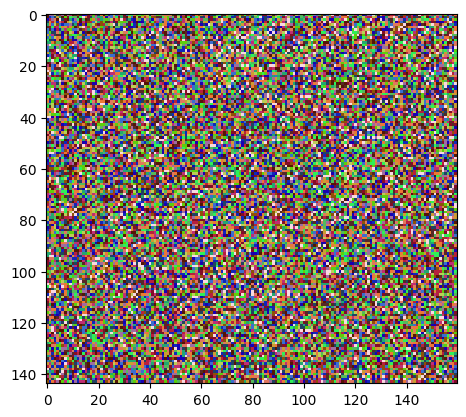

In [3]:

def random_genome():

    blocks = np.random.randint(NUM_COLORS, 
        size=(BLOCK_COUNT, BLOCK_WIDTH, BLOCK_WIDTH))
    
    indices = np.random.randint(BLOCK_COUNT,
        size=(BLOCKS_HORIZONTAL, BLOCKS_VERTICAL))

    return blocks, indices

def img_of_genome(g):
    blocks, indices = g
    w = BLOCKS_HORIZONTAL * BLOCK_WIDTH
    h = BLOCKS_VERTICAL * BLOCK_WIDTH
    img = np.zeros((w, h, 3))
    for i in range(BLOCKS_HORIZONTAL):
        for j in range(BLOCKS_VERTICAL):
            x = BLOCK_WIDTH * i
            y = BLOCK_WIDTH * j
            curr_block = blocks[indices[i,j]]
            colored_block = colors[curr_block[:,:]]
            img[x:x + BLOCK_WIDTH, y:y+BLOCK_WIDTH] = np.copy(colored_block)
    return img / 255
        
def show_img(img):
    imshow(img.swapaxes(0,1), interpolation="nearest", )
    show()

random_img = img_of_genome(random_genome())

print("Random genome")
show_img(random_img)

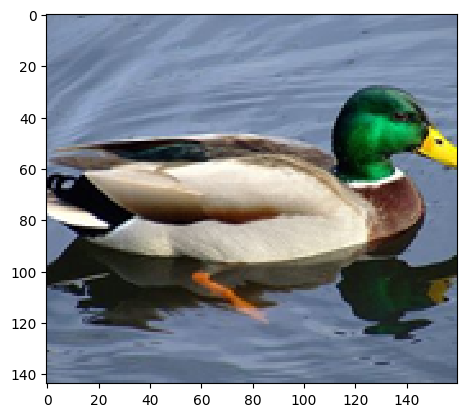

In [4]:
from PIL import Image
import numpy as np

def resize_and_crop(image_path, desired_width, desired_height):
    # Open the image using Pillow
    image = Image.open(image_path)
    original_width, original_height = image.size
    
    # Calculate the aspect ratios
    original_aspect = original_width / original_height
    desired_aspect = desired_width / desired_height

    # Resize the image while maintaining aspect ratio
    if original_aspect > desired_aspect:
        # Image is wider than desired aspect ratio
        new_height = desired_height
        new_width = int(new_height * original_aspect)
    else:
        # Image is taller than desired aspect ratio
        new_width = desired_width
        new_height = int(new_width / original_aspect)
    
    image = image.resize((new_width, new_height))
    
    # Calculate cropping coordinates
    left = (new_width - desired_width) / 2
    top = (new_height - desired_height) / 2
    right = left + desired_width
    bottom = top + desired_height

    # Crop the image
    image = image.crop((left, top, right, bottom))

    # Convert the image to a numpy array
    image_array = np.array(image)
    
    return image_array

duck_cropped = resize_and_crop("duck.jpg", BLOCK_WIDTH * BLOCKS_HORIZONTAL, BLOCK_WIDTH * BLOCKS_VERTICAL)
duck_goal = duck_cropped.swapaxes(0, 1) / 255

show_img(duck_goal)



In [42]:


def error(goal, img):
    err = np.sum((goal - img)**2)
    return err

# error(duck_goal, random_img)

In [6]:

def buffer_of_genome(genome):
    blocks, indices = genome
    return np.concatenate((blocks.flatten(), indices.flatten()))

def genome_of_buffer(buffer):
    block_data_length = BLOCK_WIDTH * BLOCK_WIDTH * BLOCK_COUNT
    blocks_raw = buffer[0:block_data_length]
    indices_raw = buffer[block_data_length:]
    blocks = blocks_raw.reshape((BLOCK_COUNT, BLOCK_WIDTH, BLOCK_WIDTH))
    indices = indices_raw.reshape((BLOCKS_HORIZONTAL, BLOCKS_VERTICAL))
    return blocks, indices

# test = random_genome()
# print(buffer_of_genome(test).shape)

# show_img(img_of_genome(test))
# show_img(img_of_genome(genome_of_buffer(buffer_of_genome(test))))

9389.477923875433


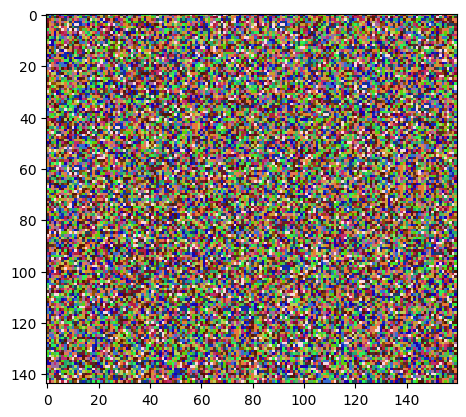

8877.445167243368


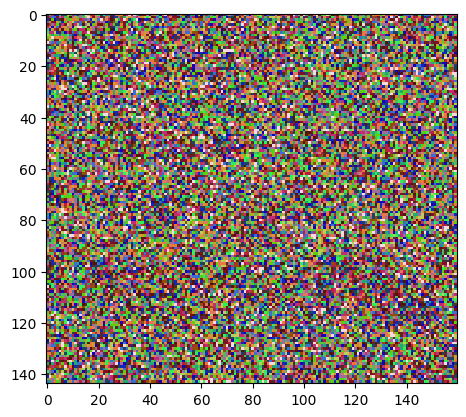

8819.6646366782


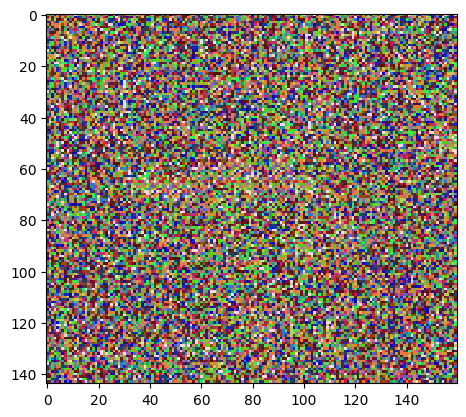

8812.59721645521


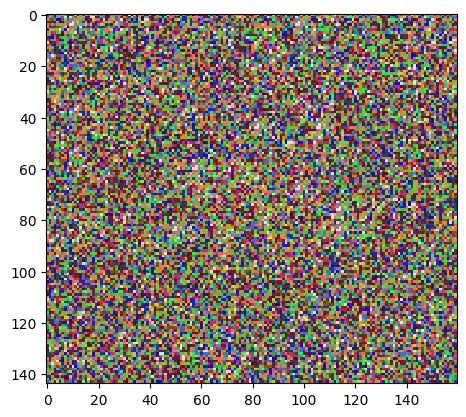

8818.594171472509


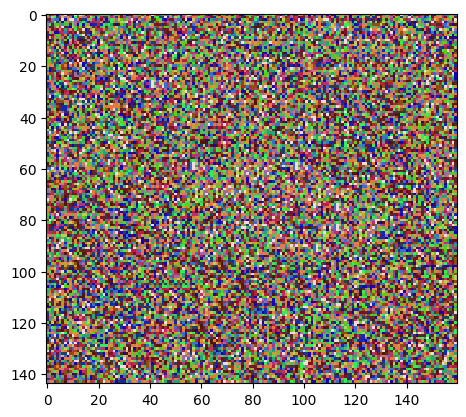

KeyboardInterrupt: 

In [64]:
import random

from matplotlib.pyplot import hist


MUTATION_PROB = 0.002
CROSSOVER_PROB = 0.8
N = 40

def get_next_population(population):

    size, = population[0].shape

    while len(population) < N:
        g = population[random.randint(0, len(population)-1)]

        # crossover
        if (random.uniform(0, 1) > CROSSOVER_PROB):
            h = population[random.randint(0, len(population)-1)]
            crossover_point = random.randint(0, size)
            g = np.concatenate((g[:crossover_point], h[crossover_point:]))
        
        # mutation
        mutation_count = int(size * MUTATION_PROB)
        for _ in range(mutation_count):
            mutation_point = random.randint(0, size-1)
            block_data_length = BLOCK_WIDTH * BLOCK_WIDTH * BLOCK_COUNT
            if mutation_point >= block_data_length:
                g[mutation_point] = random.randint(0, BLOCK_COUNT-1)
            else:
                g[mutation_point] = random.randint(0, NUM_COLORS-1)

        population.append(g)
    return population

def natural_selection(population):
    bufs_image = [ (buf, img_of_genome(genome_of_buffer(buf))) for buf in population ]
    bufs_image_err = [ (buf, img, error(duck_goal, img)) for (buf, img) in bufs_image ]
    bufs_image_err.sort(key=lambda x: x[2])
    _, best, best_err = bufs_image_err[0]
    half_pop = bufs_image_err[:N//2]
    only_bufs = [ buf for (buf, _, _) in half_pop ]
    return only_bufs, best, best_err


pop = [ buffer_of_genome(random_genome()) for x in range(N) ]



gen = 0
best = None
while True:
    pop, curr_best, best_error = natural_selection(pop)
    # print(curr_best)
    # print(best_error)
    pop = get_next_population(pop)
    
    if (gen % 2000 == 0):
        print(best_error)
        show_img(curr_best)

    gen += 1